# Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [2]:
#Loading train dataset:-

df_train=pd.read_csv('termdeposit_train.csv')
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
#Loading test dataset:-

df_test=pd.read_csv('termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df_train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
df_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [8]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [10]:
print(df_train.shape)

(31647, 18)


In [11]:
print(df_test.shape)

(13564, 17)


# Exploratory Data Analysis(EDA):-

In [12]:
print("The shape of the train dataset is:",df_train.shape)

The shape of the train dataset is: (31647, 18)


In [13]:
print("The shape of the test dataset is:",df_test.shape)

The shape of the test dataset is: (13564, 17)


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


# Description:-

In [16]:
df_train.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [17]:
df_test.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,13564.000000,13564.000000,13564,13564,13564,13564,13564.000000,13564,13564,13564,13564.000000,13564,13564.000000,13564.000000,13564.000000,13564.000000,13564
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,NaN,2890,8119,6978,13334,NaN,7546,11451,8862,NaN,4097,NaN,NaN,NaN,NaN,11030
mean,22704.057726,40.887128,NaN,NaN,NaN,NaN,1358.496535,NaN,NaN,NaN,15.738646,NaN,258.278679,2.759510,41.648555,0.594441,NaN
std,12994.043329,10.604108,NaN,NaN,NaN,NaN,3082.940623,NaN,NaN,NaN,8.288174,NaN,258.488648,3.060928,101.985178,1.998193,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,11546.000000,33.000000,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,8.000000,NaN,102.000000,1.000000,-1.000000,0.000000,NaN
50%,22782.000000,39.000000,NaN,NaN,NaN,NaN,445.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,33974.250000,48.000000,NaN,NaN,NaN,NaN,1413.250000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN


In [18]:
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [19]:
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [20]:
df_train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


In [21]:
df_test.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000


# Finding Null values:-

In [22]:
#checking null values in train dataset:-

print(df_train.isna().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [23]:
#checking null values in test dataset:-

print(df_test.isna().sum())

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


<Axes: >

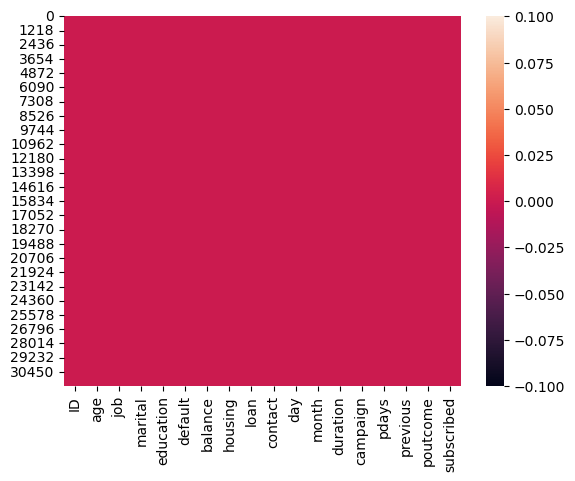

In [24]:
sns.heatmap(df_train.isnull())

<Axes: >

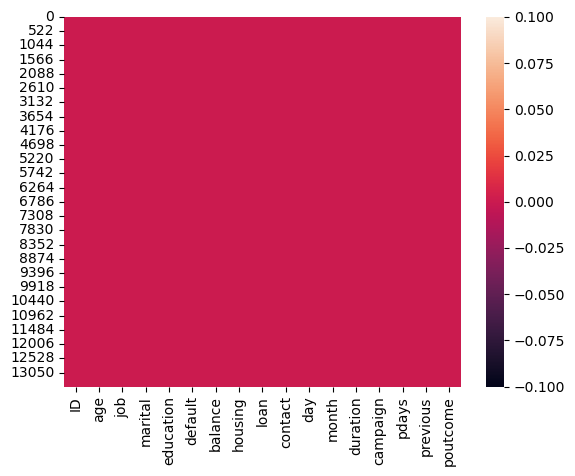

In [25]:
sns.heatmap(df_test.isnull())

In [26]:
for col in df_train.select_dtypes(include='object').columns:
    print(col)
    print(df_train[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


In [27]:
for col in df_test.select_dtypes(include='object').columns:
    print(col)
    print(df_test[col].unique())

job
['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown']
marital
['married' 'divorced' 'single']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['cellular' 'telephone' 'unknown']
month
['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct']
poutcome
['unknown' 'failure' 'other' 'success']


In [28]:
for column in df_train.columns:
    print(column,df_train[column].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [29]:
for column in df_test.columns:
    print(column,df_test[column].nunique())

ID 13564
age 75
job 12
marital 3
education 4
default 2
balance 4292
housing 2
loan 2
contact 3
day 31
month 12
duration 1201
campaign 40
pdays 422
previous 33
poutcome 4


In [30]:
#Explore the categorical features in train dataset:-

categorical_features=[feature for feature in df_train.columns if ((df_train[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [31]:
#Explore the categorical features in test dataset:-

categorical_features=[feature for feature in df_test.columns if ((df_test[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [32]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


In [33]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_test[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


# Data Analysis and Visualization:-

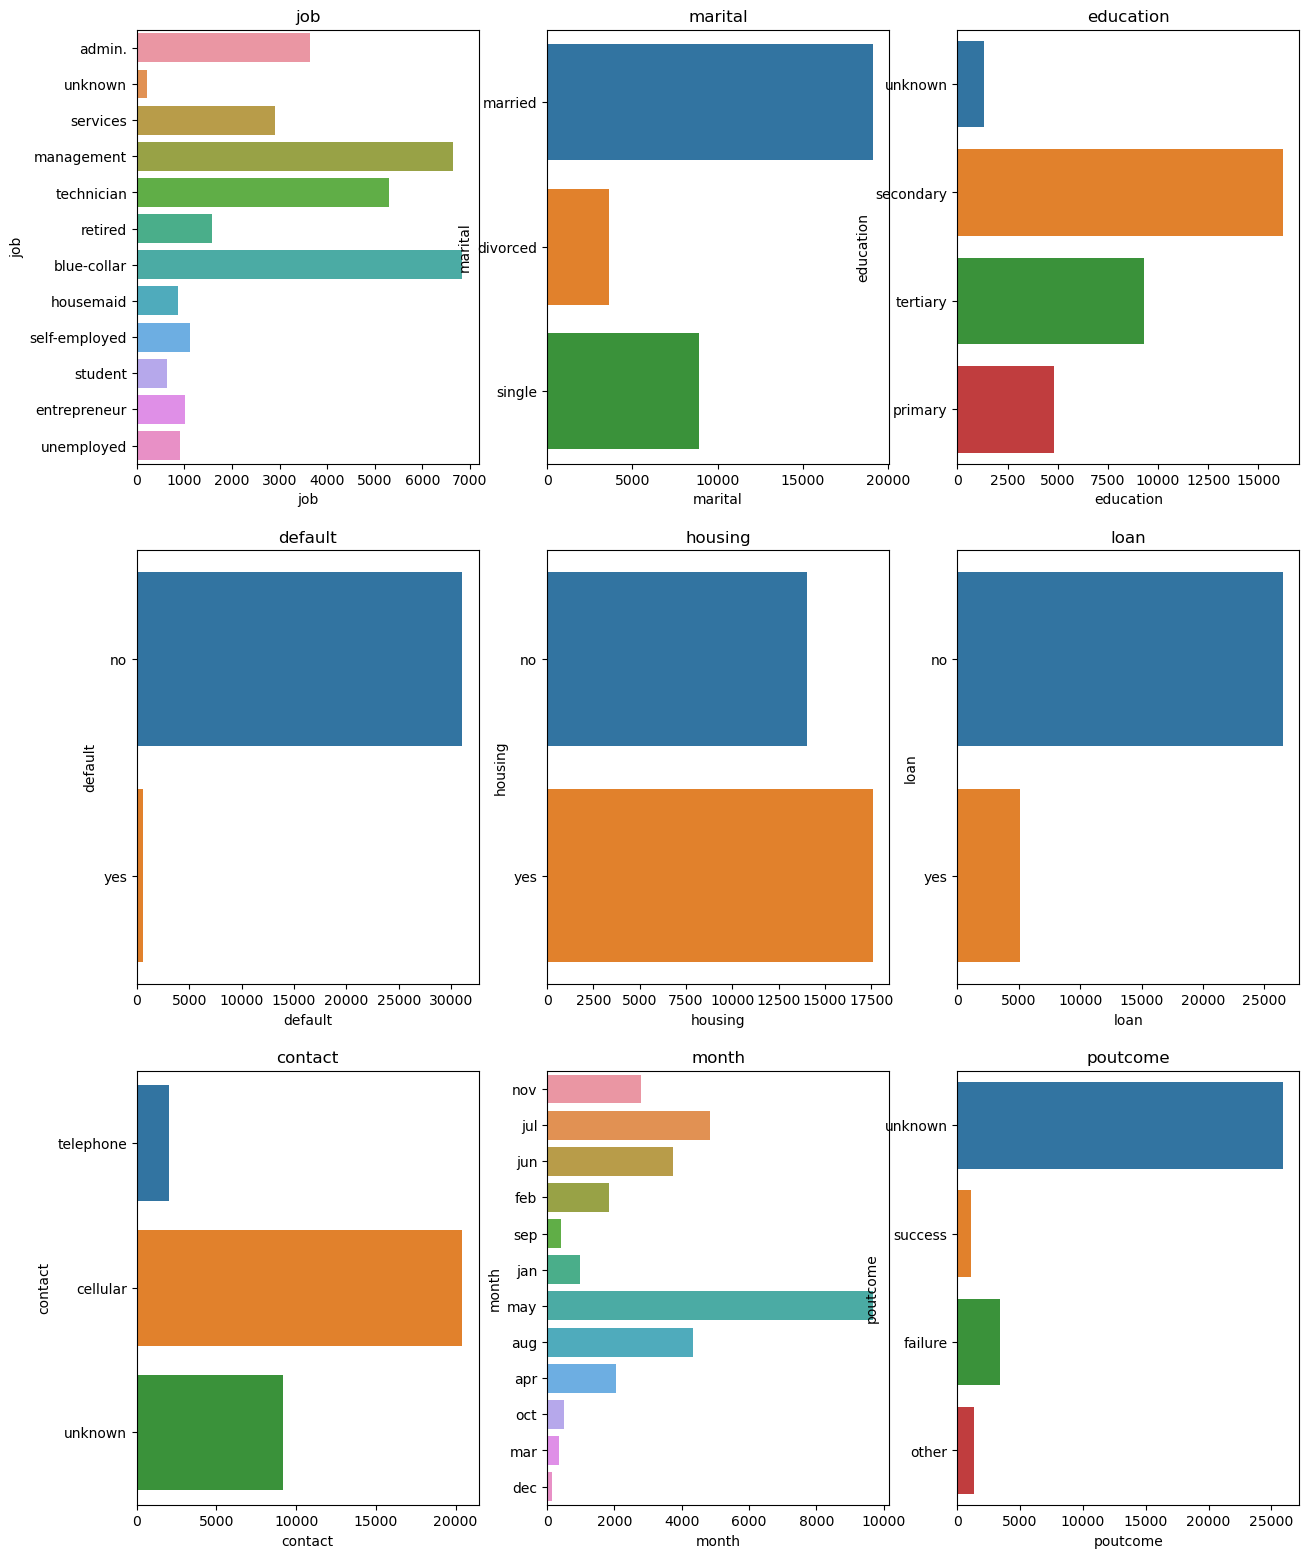

In [34]:
#Check count based on categorical features in train dataset:-

plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df_train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

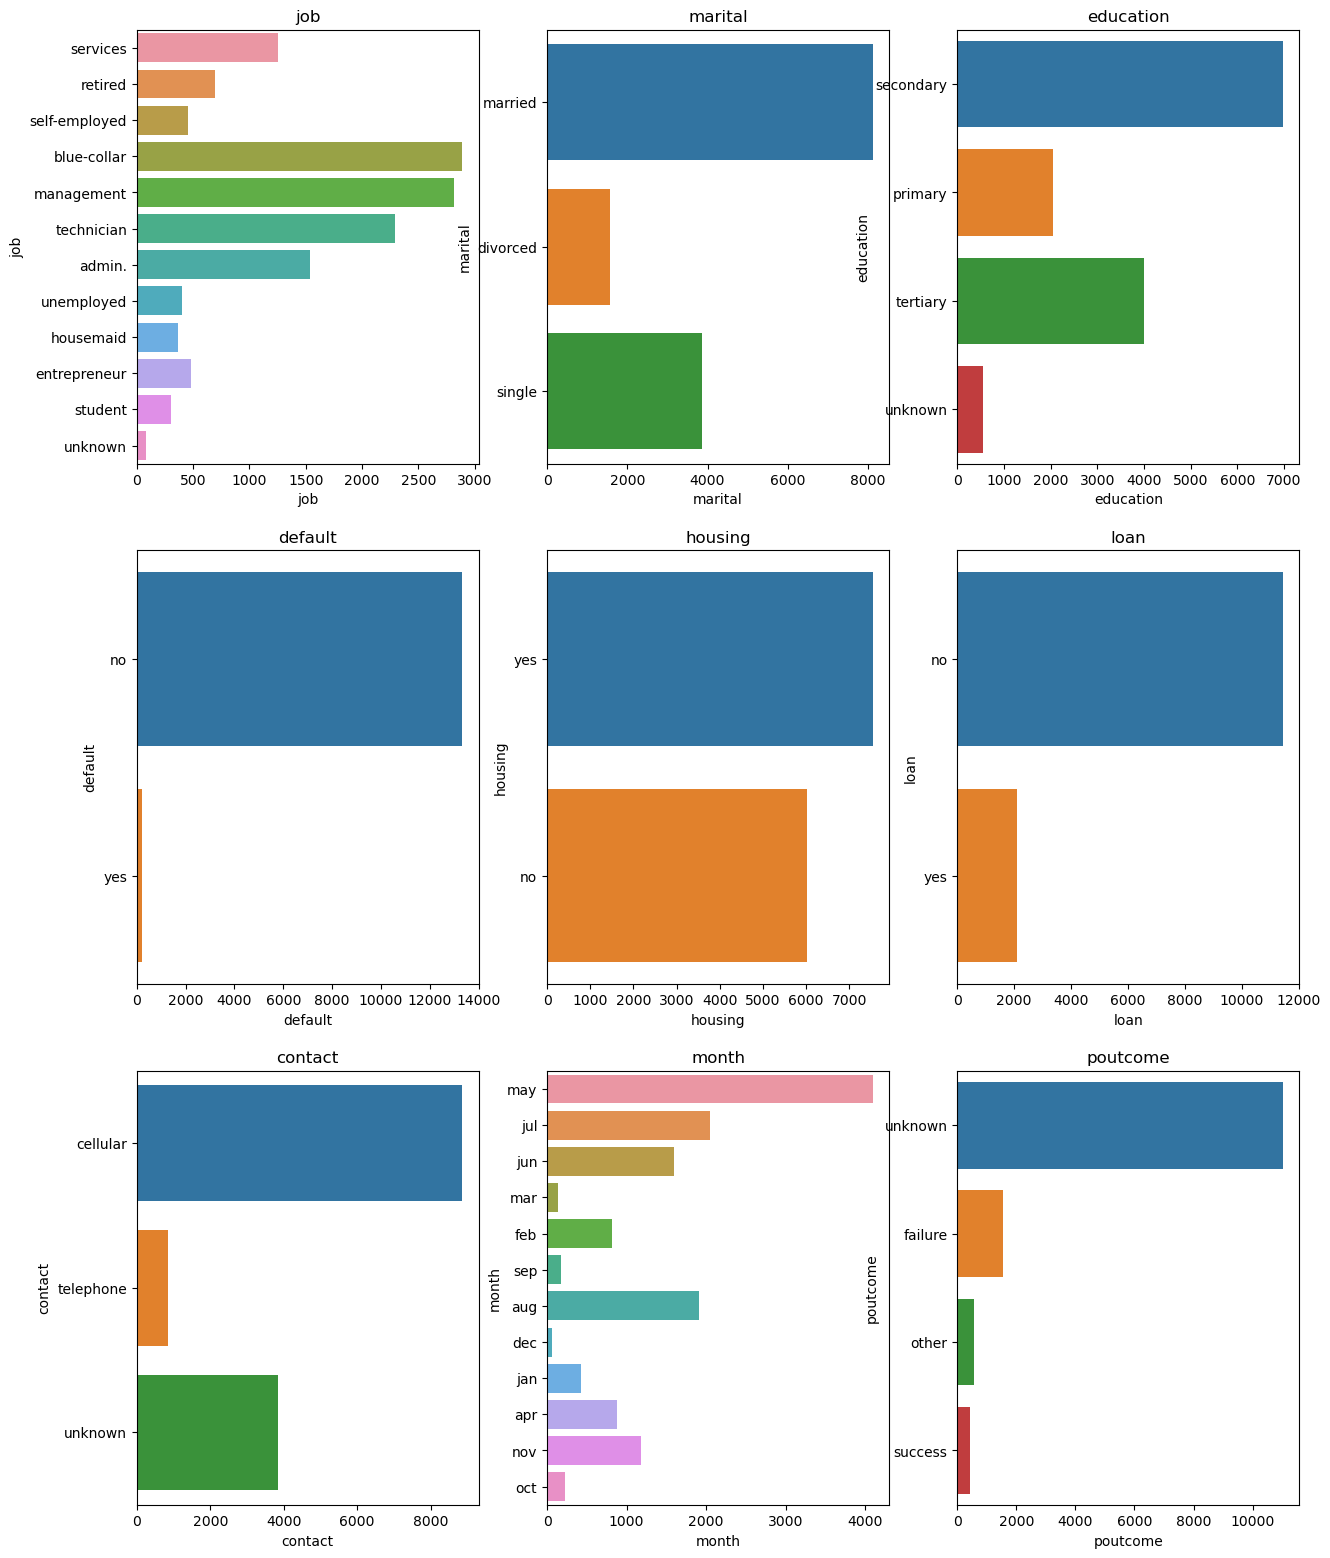

In [35]:
##Check count based on categorical features in train dataset:-

plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df_test)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

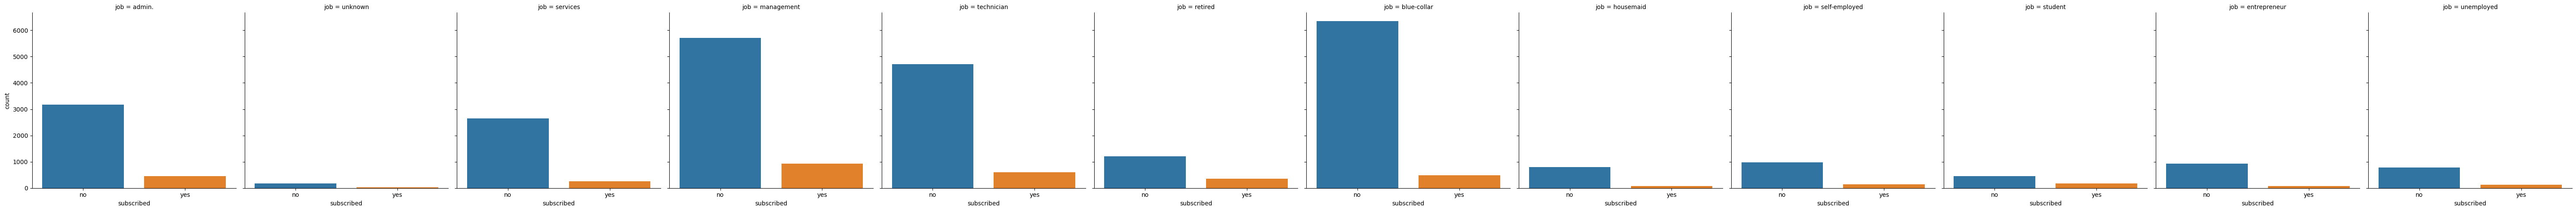

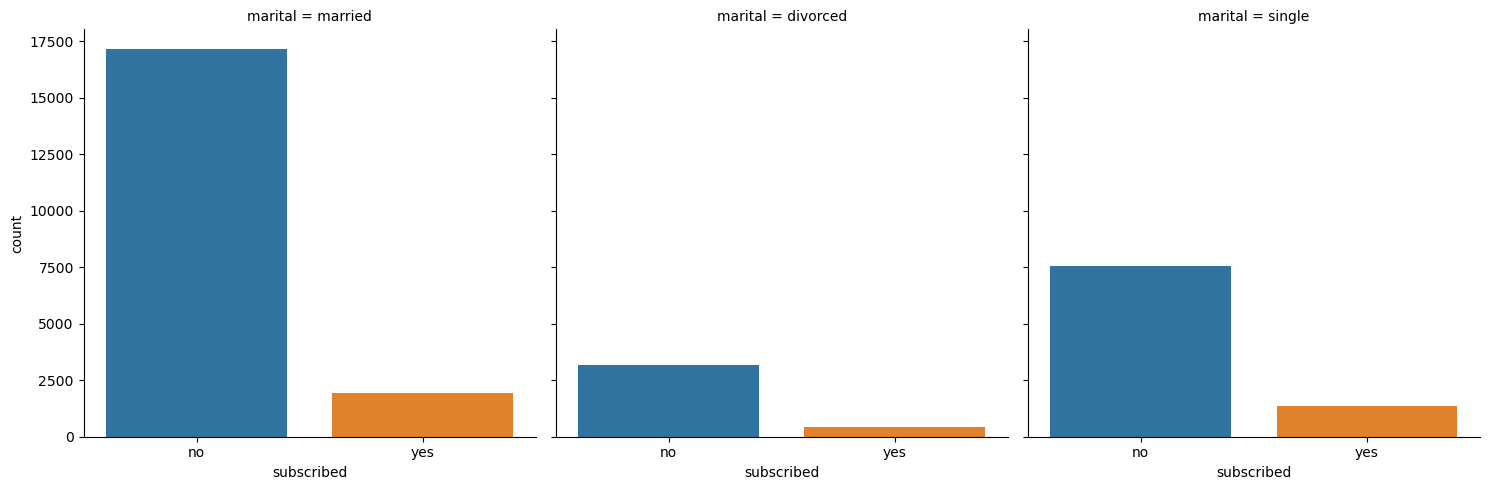

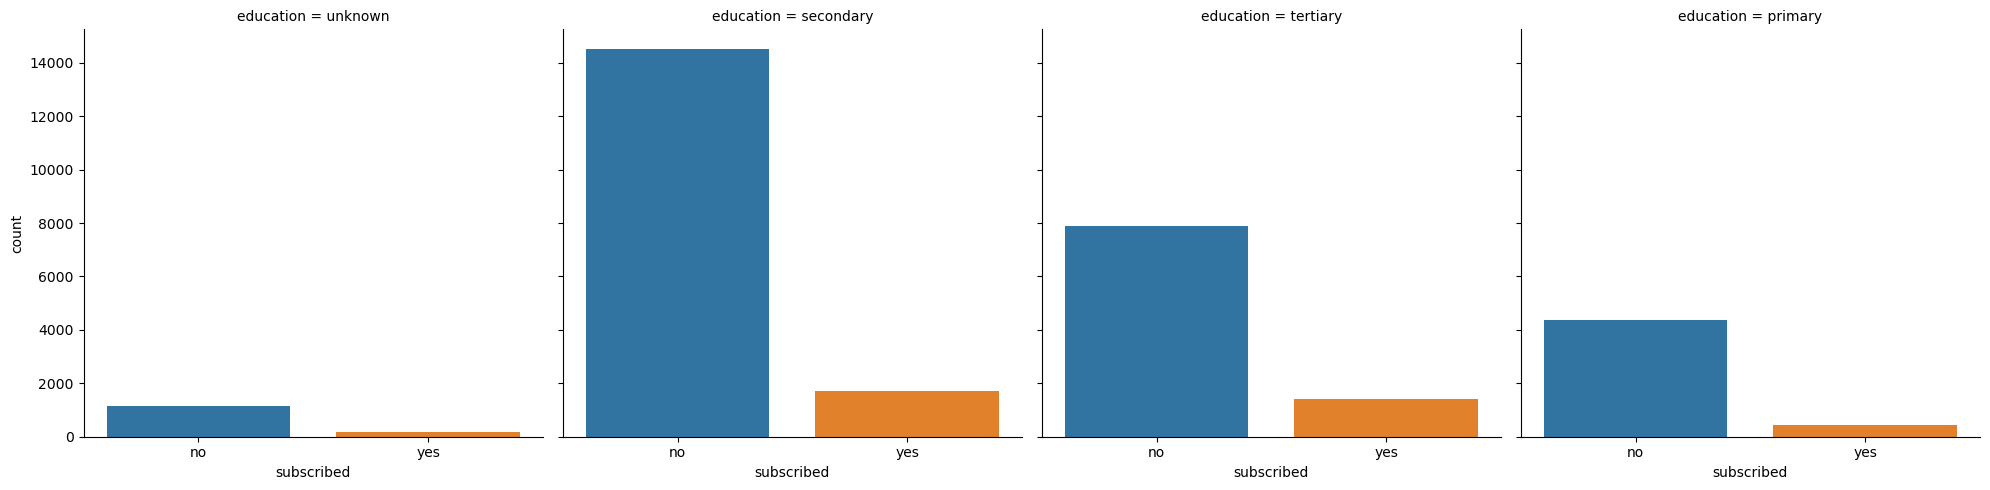

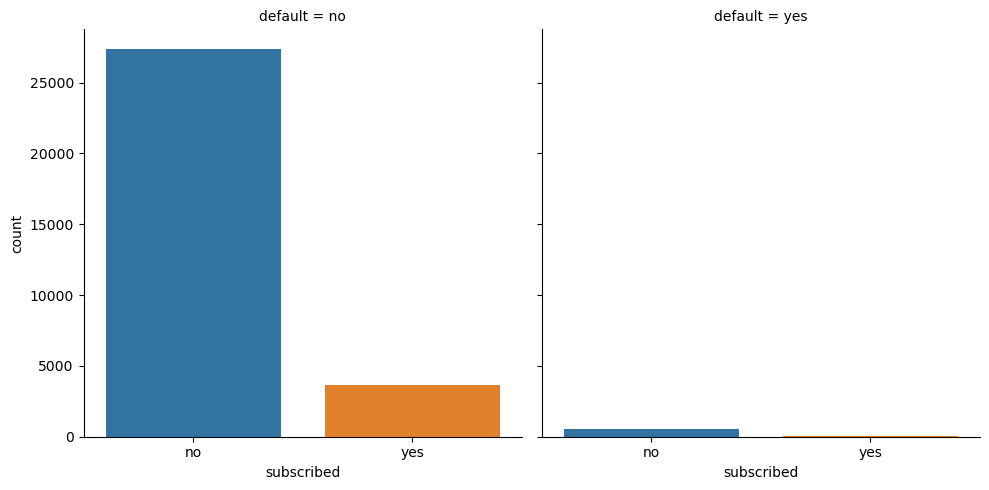

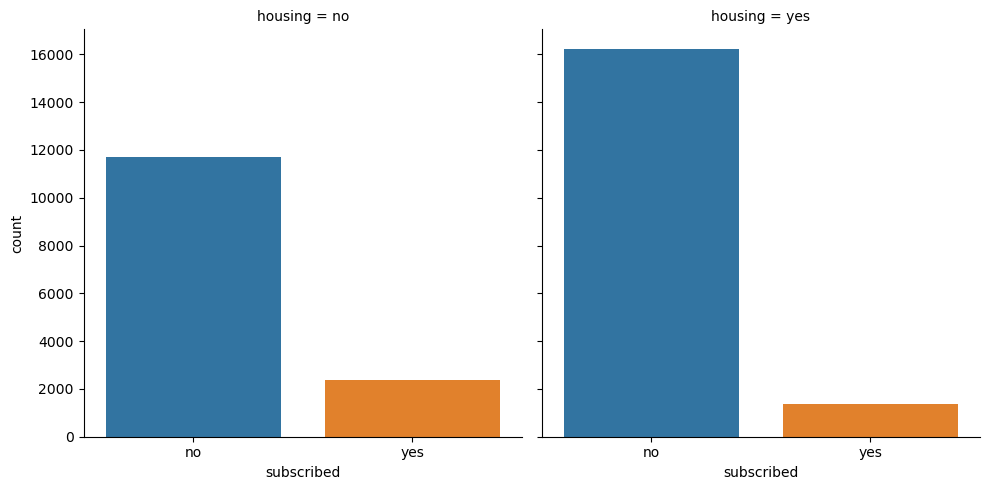

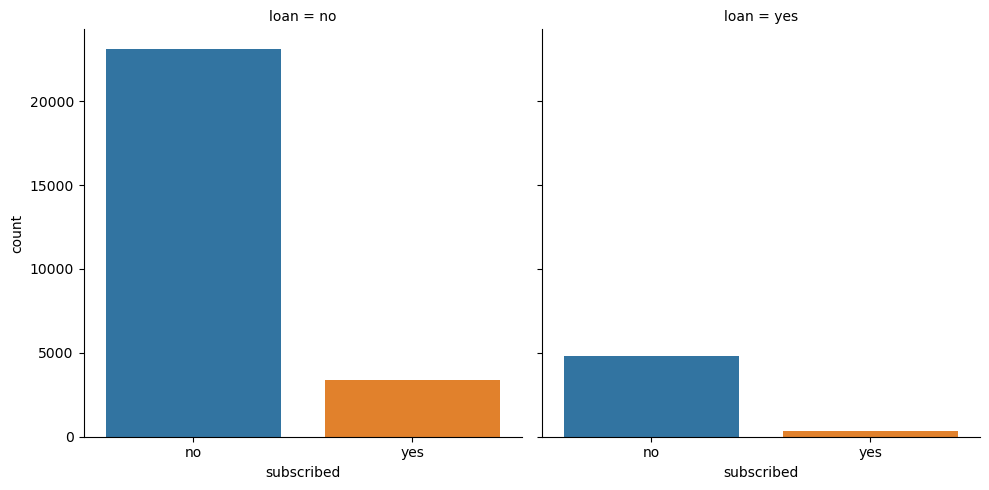

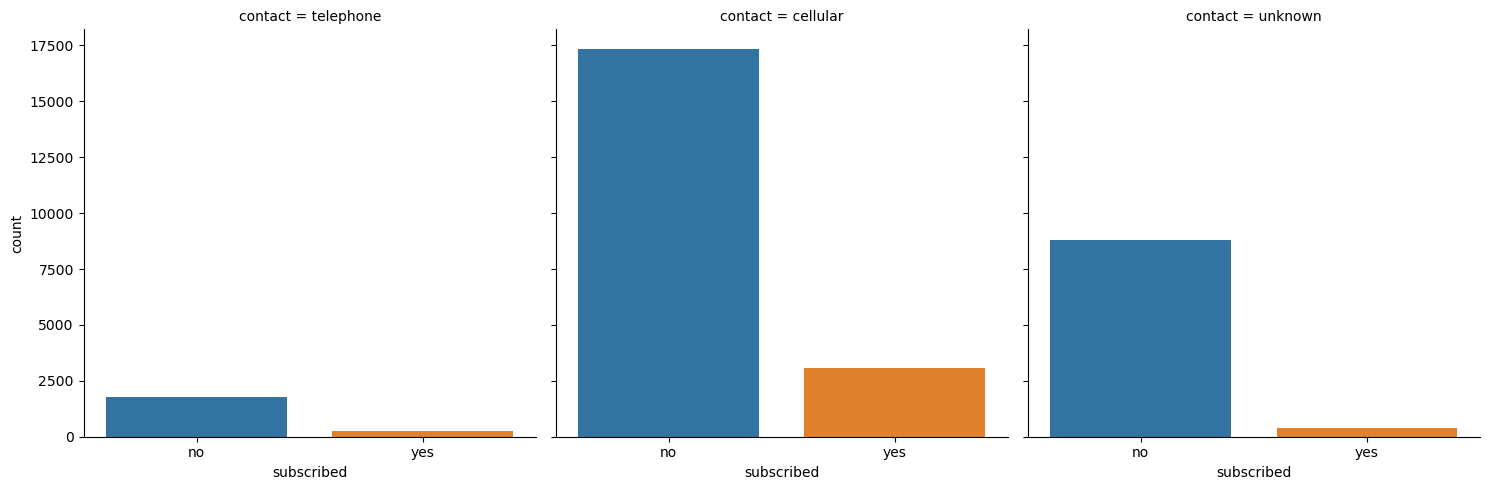

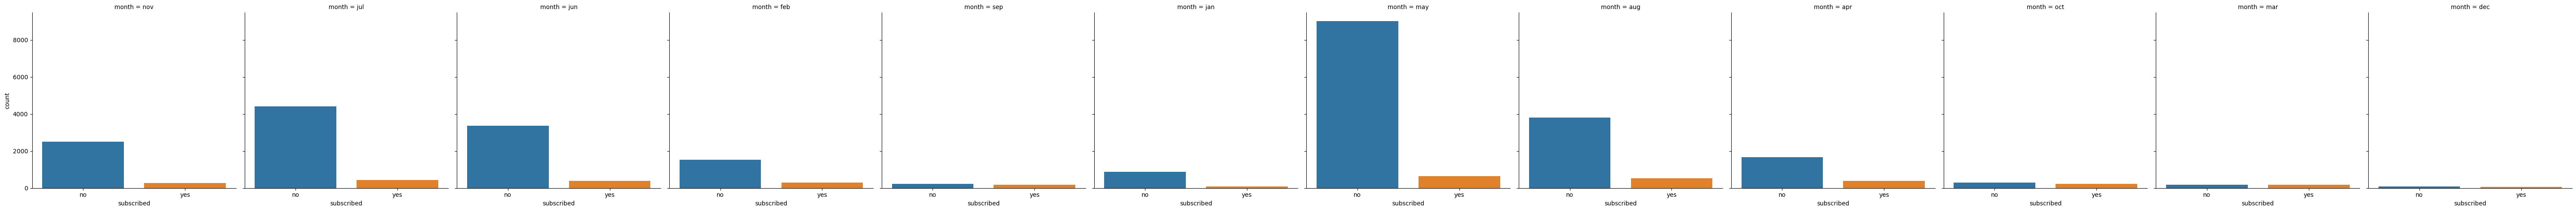

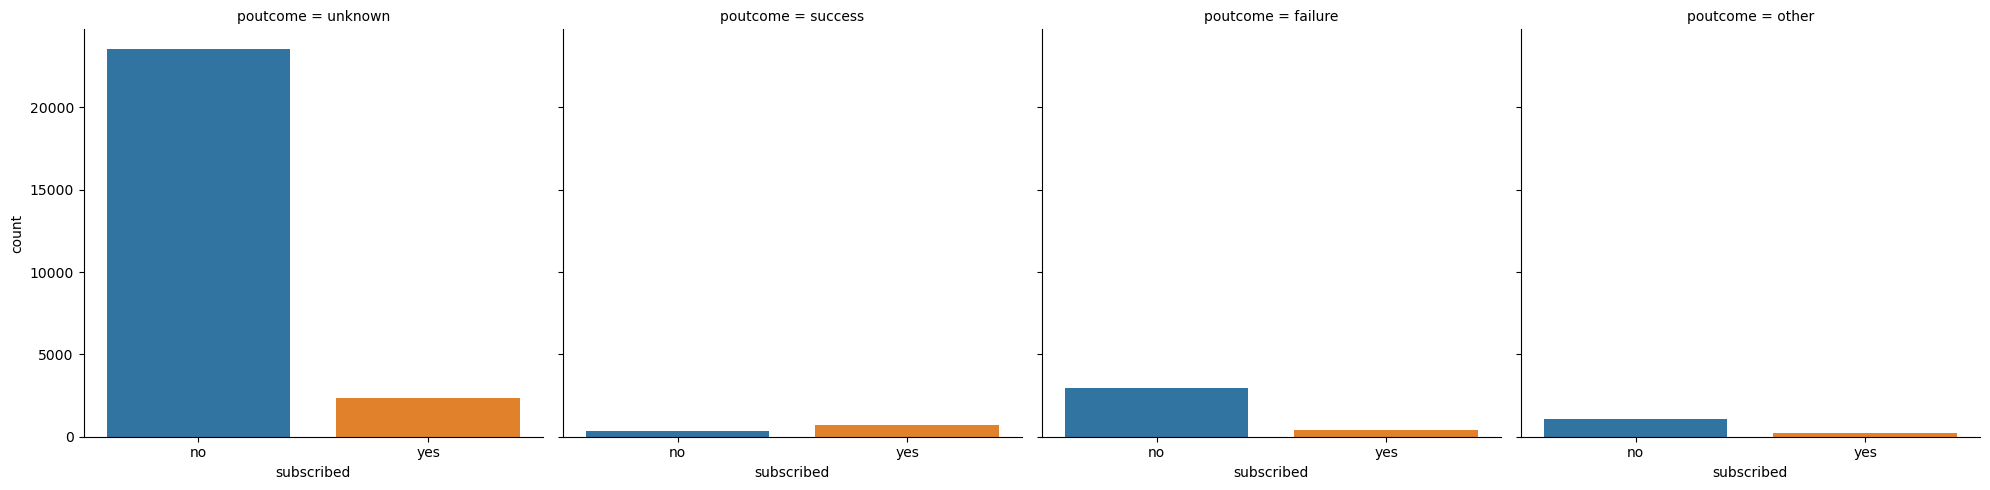

In [36]:
#Check target label split over categorical features:-
#Find out the relationship between categorical variable and dependent variable:

for categorical_feature in categorical_features:
    sns.catplot(x='subscribed',col=categorical_feature,kind='count',data=df_train)
plt.show()

In [37]:
#Check target label split over categorical features and find the count:-
for categorical_feature in categorical_features:
    print(df_train.groupby(['subscribed',categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

In [38]:
#List of numerical variables:-
numerical_features=[feature for feature in df_train.columns if ((df_train[feature].dtypes != 'O') & (feature not in ['subscribed']))]
print('Number of numerical variables:',len(numerical_features))

#visualise the numerical variables:-
df_train[numerical_features].head()

Number of numerical variables: 8


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0


In [39]:
numerical_features=[feature for feature in df_test.columns if ((df_test[feature].dtypes != 'O'))]
print('Number of numerical variables:',len(numerical_features))

#visualise the numerical variables:-
df_test[numerical_features].head()

Number of numerical variables: 8


,ID,age,balance,day,duration,campaign,pdays,previous
0,38441,32,118,15,20,6,-1,0
1,40403,78,2787,1,372,1,-1,0
2,3709,31,144,16,676,1,-1,0
3,37422,57,3777,13,65,2,-1,0
4,12527,45,-705,3,111,1,-1,0


In [40]:
#Checking discrete features:-

discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))

Discrete Variables Count:0


In [41]:
#Checking discrete features:-

discrete_feature=[feature for feature in numerical_features if len(df_test[feature].unique())<25]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))

Discrete Variables Count:0


In [42]:
#Checking continuous features:-

continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['subscribed']]
print('Continuous Features Count:{}'.format(len(continuous_features)))

Continuous Features Count:8


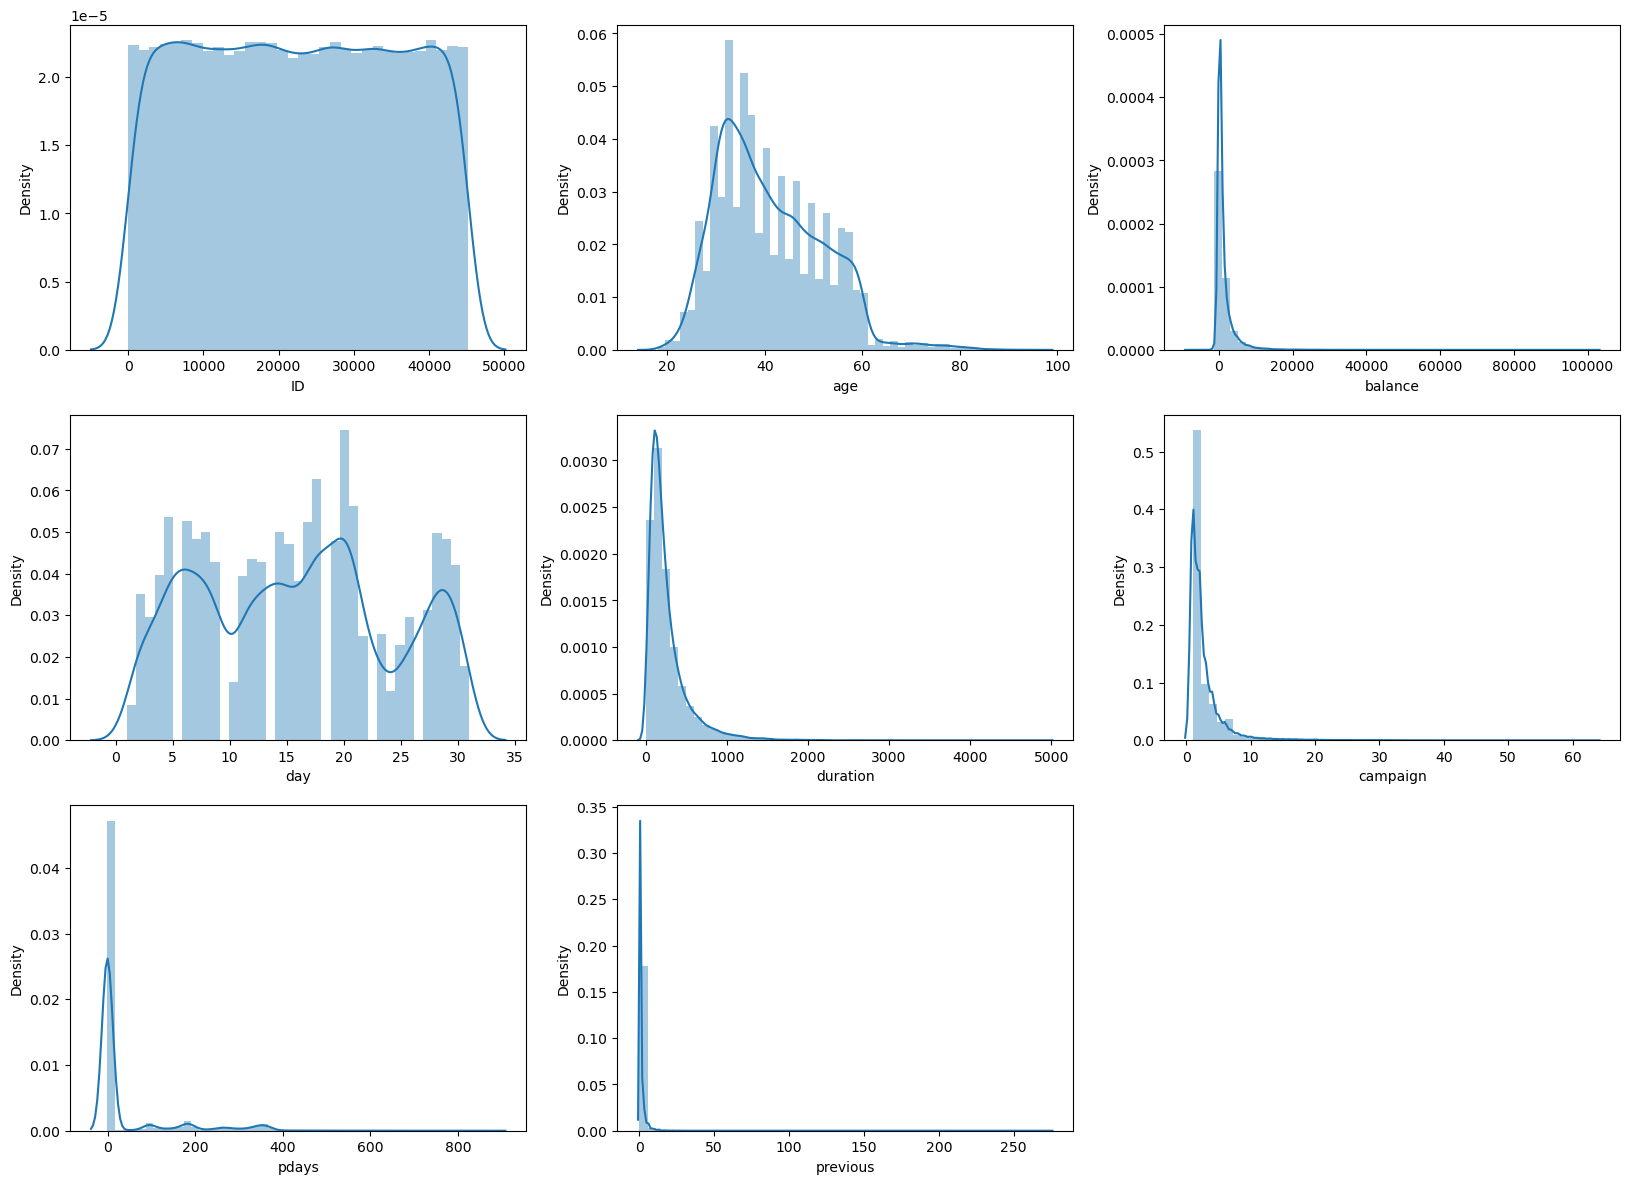

In [43]:
#plot a univariate distribution of continuous observations:-
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

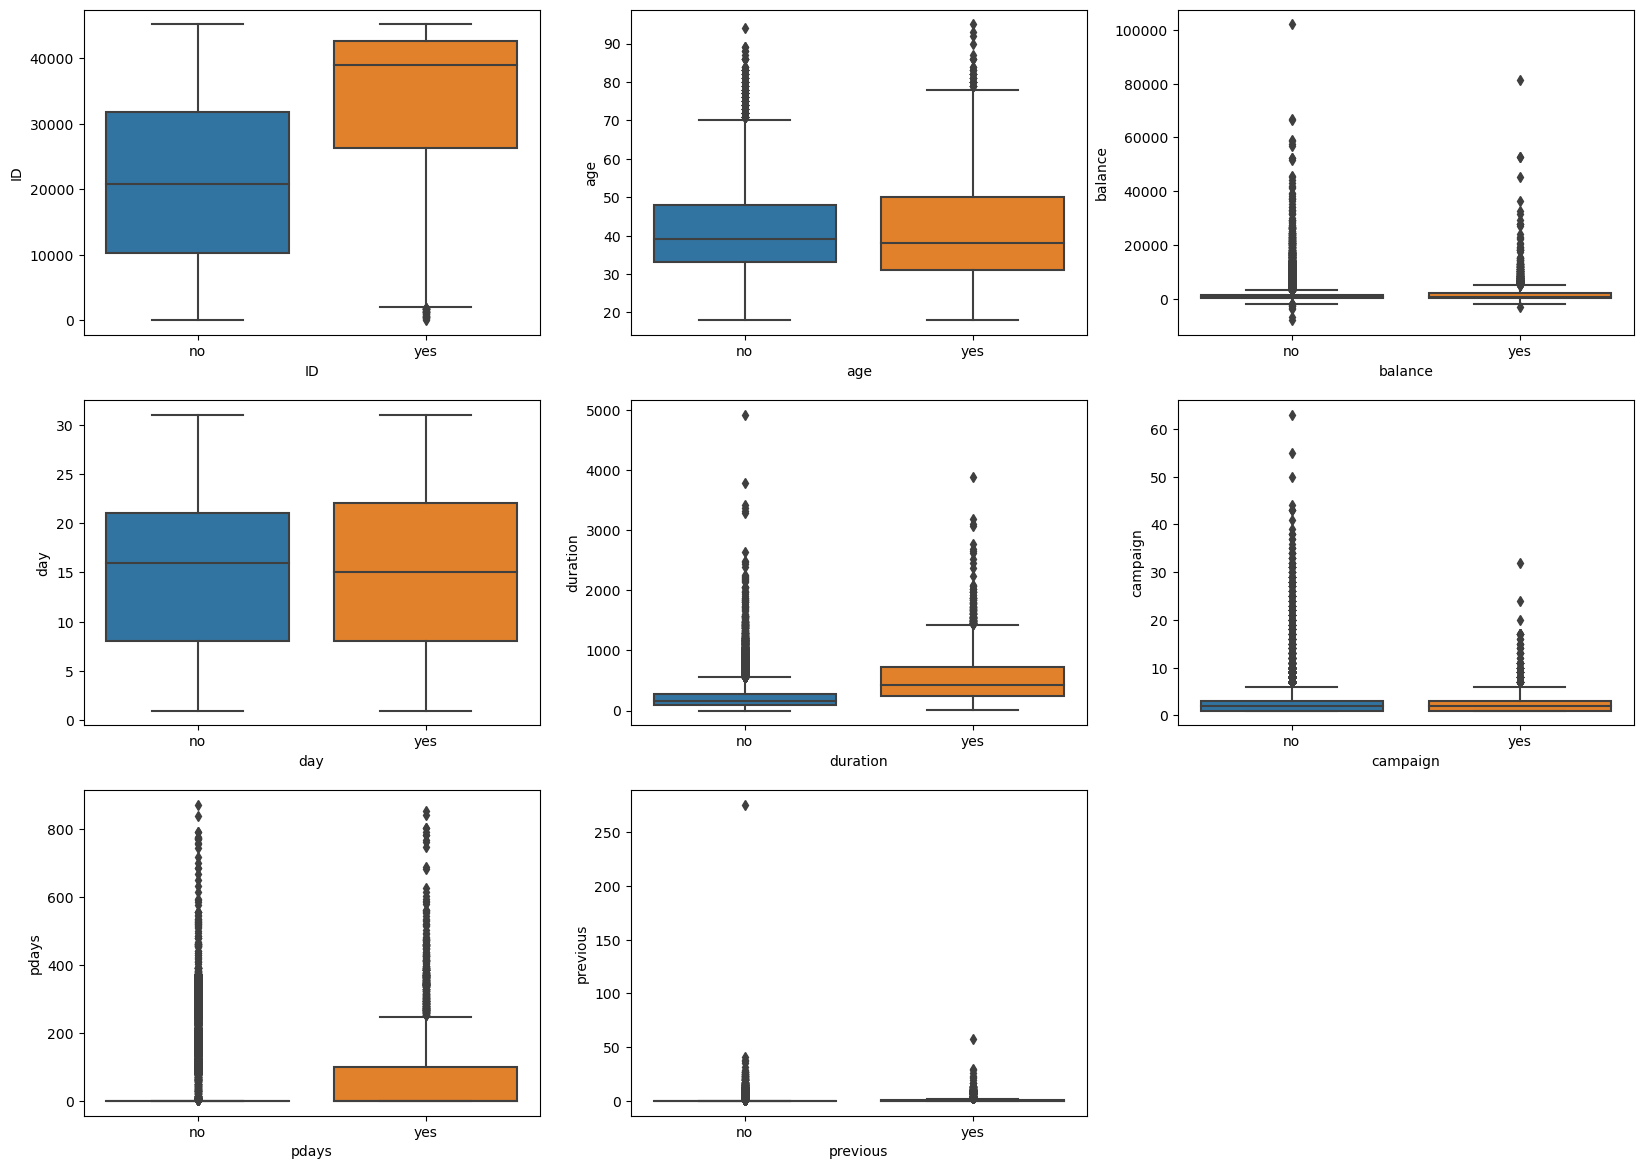

In [44]:
#boxplot to show target distribution with respect numerical features:-
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='subscribed',y=df_train[feature],data=df_train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

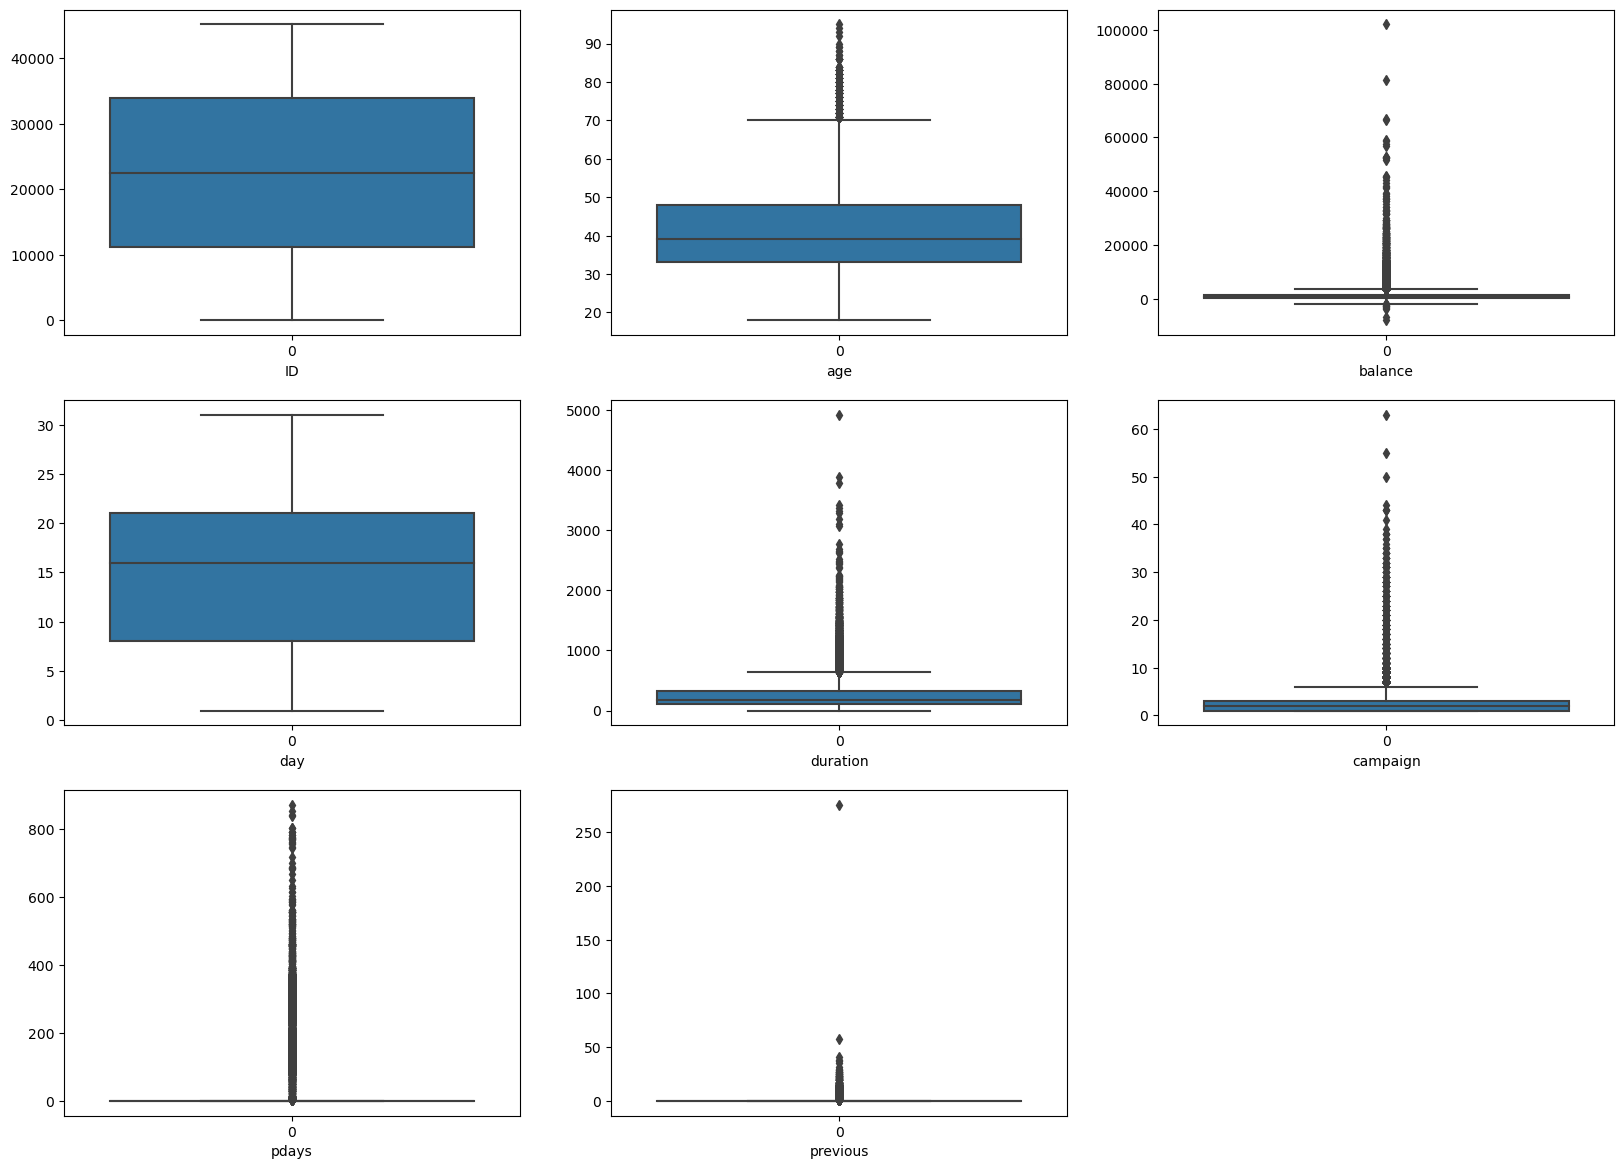

In [45]:
#boxplot on numerical features to find outliers in train dataset:-
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

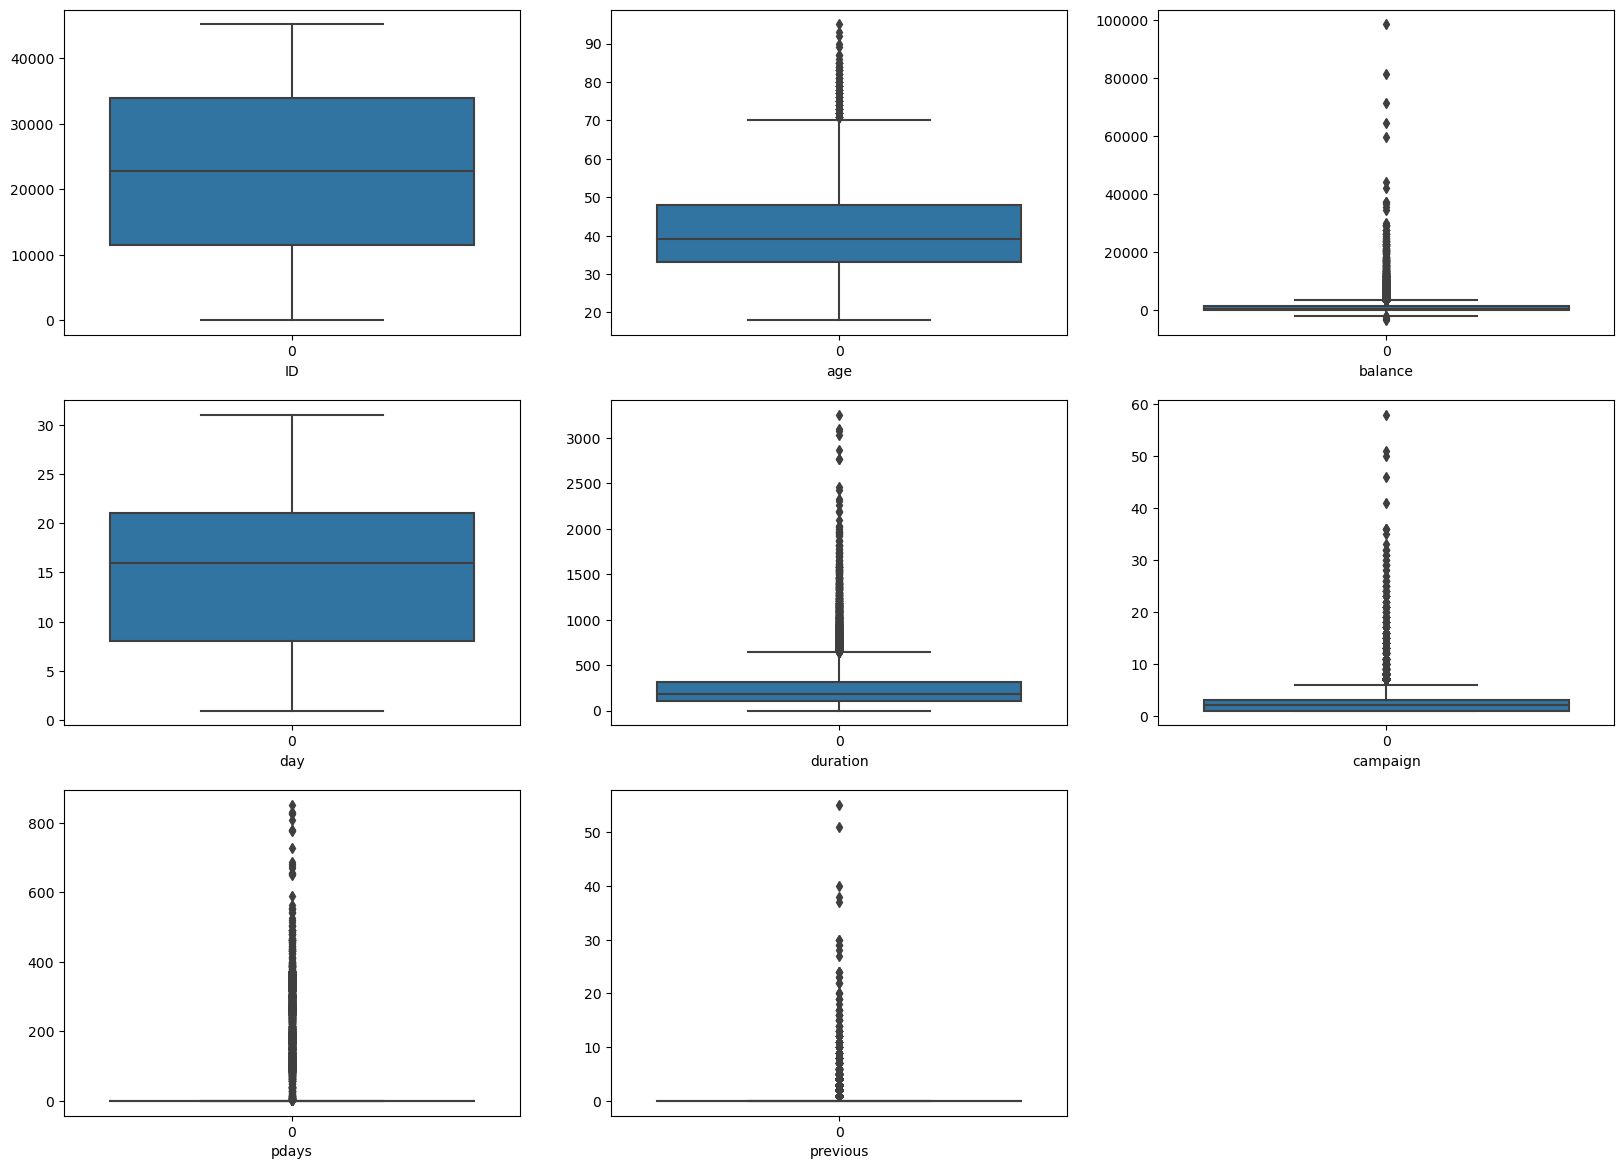

In [46]:
##boxplot on numerical features to find outliers in test dataset:-

plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df_test[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<Axes: >

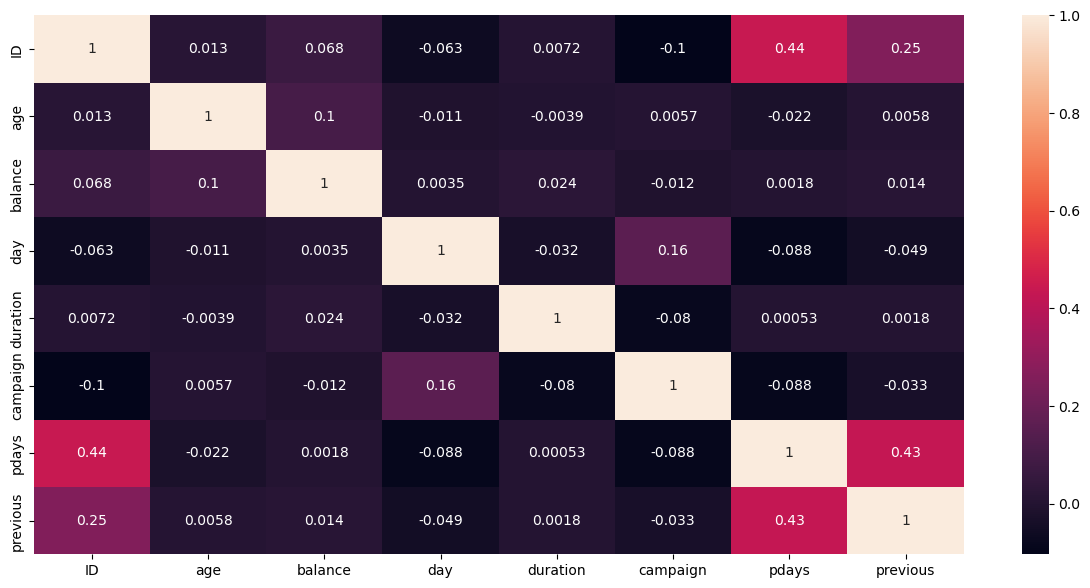

In [47]:
#checking for correlation in train dataset:-

cor_mat=df_train.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

<Axes: >

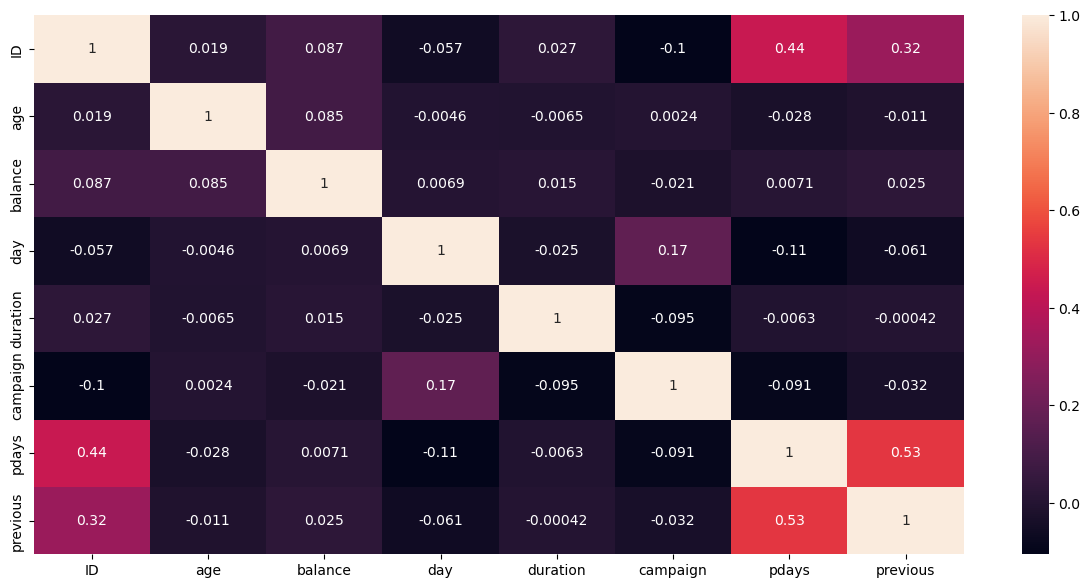

In [48]:
##checking for correlation in test dataset:-

cor_mat=df_test.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

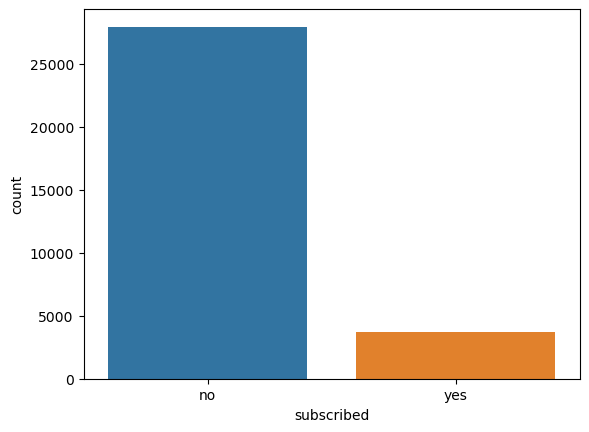

In [49]:
#Countplot of target variable:-

sns.countplot(x='subscribed',data=df_train)
plt.show()

In [50]:
from glob import glob

In [51]:
df_data=sorted(glob('termdeposit_*.csv'))
df_data

['termdeposit_test.csv', 'termdeposit_train.csv']

In [52]:
#combine the both train and test dataset:-

mergeddata=pd.concat(pd.read_csv(datafile)
                     for datafile in df_data)

In [53]:
mergeddata

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,NaN
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,NaN
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,NaN
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,NaN
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [54]:
mergeddata['subscribed'].groupby(mergeddata['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [55]:
df1=mergeddata

In [56]:
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,NaN
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,NaN
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,NaN
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,NaN
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [57]:
df1=df1.dropna(axis=0)
df1.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [58]:
df1.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [59]:
df_cat=df1.select_dtypes(np.object)
df_num=df1.select_dtypes(np.number)

In [60]:
df_num

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0
31643,40178,53,380,5,438,2,-1,0
31644,19710,32,312,7,37,3,-1,0
31645,38556,57,225,15,22,7,337,12


In [61]:
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


In [62]:
from sklearn.preprocessing import OrdinalEncoder

# Apply label encoder:-

In [63]:
#converting data to numerical type using LabelEncoder:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df1.housing.drop_duplicates())
df1.housing= label.transform(df1.housing)

label.fit(df1.loan.drop_duplicates())
df1.loan= label.transform(df1.loan)

label.fit(df1.subscribed.drop_duplicates())
df1.subscribed= label.transform(df1.subscribed)

df1.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing        int32
loan           int32
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed     int32
dtype: object

# Apply ordinal encoder:-

In [64]:
enc=OrdinalEncoder()

In [65]:
df1['job']=enc.fit_transform(df1[['job']])
df1['marital']=enc.fit_transform(df1[['marital']])
df1['education']=enc.fit_transform(df1[['education']])
df1['default']=enc.fit_transform(df1[['default']])
df1['contact']=enc.fit_transform(df1[['contact']])
df1['month']=enc.fit_transform(df1[['month']])
df1['poutcome']=enc.fit_transform(df1[['poutcome']])

In [66]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,40576,31,11.0,1.0,1.0,0.0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,15320,27,7.0,1.0,1.0,0.0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,43962,57,4.0,0.0,2.0,0.0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,29842,31,9.0,1.0,1.0,0.0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0


In [67]:
df1.dtypes

ID              int64
age             int64
job           float64
marital       float64
education     float64
default       float64
balance         int64
housing         int32
loan            int32
contact       float64
day             int64
month         float64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
subscribed      int32
dtype: object

# Outliers Removal:-

In [68]:
import scipy.stats as stats
from scipy.stats import zscore

In [69]:
#z score method:

z=np.abs(zscore(df1))
threshold=3
np.where(z>3)
df_new=df1[(z<3).all(axis=1)]
df_new

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,40576,31,11.0,1.0,1.0,0.0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,15320,27,7.0,1.0,1.0,0.0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,43962,57,4.0,0.0,2.0,0.0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,29842,31,9.0,1.0,1.0,0.0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4.0,2.0,1.0,0.0,2968,0,0,2.0,20,6.0,30,4,-1,0,3.0,0
31641,9476,37,9.0,2.0,2.0,0.0,1309,0,0,2.0,6,6.0,442,2,-1,0,3.0,0
31642,36483,29,4.0,2.0,2.0,0.0,0,1,0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,40178,53,4.0,0.0,2.0,0.0,380,0,1,0.0,5,6.0,438,2,-1,0,3.0,1


In [70]:
df_x=df_new.iloc[:,0:17]

In [71]:
df_x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0.0,1.0,3.0,0.0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0
1,40576,31,11.0,1.0,1.0,0.0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0
2,15320,27,7.0,1.0,1.0,0.0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0
4,29842,31,9.0,1.0,1.0,0.0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4.0,2.0,1.0,0.0,2968,0,0,2.0,20,6.0,30,4,-1,0,3.0
31641,9476,37,9.0,2.0,2.0,0.0,1309,0,0,2.0,6,6.0,442,2,-1,0,3.0
31642,36483,29,4.0,2.0,2.0,0.0,0,1,0,0.0,12,8.0,116,2,-1,0,3.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0,1,0.0,5,6.0,438,2,-1,0,3.0


In [72]:
df_y=df_new.iloc[:,-1]

In [73]:
df_y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 27584, dtype: int32

In [74]:
df_y.value_counts()

0    24762
1     2822
Name: subscribed, dtype: int64

# Applying SMOTE:-

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smt=SMOTE()

In [77]:
train_X,train_y=smt.fit_resample(df_x,df_y)

In [78]:
train_X.value_counts()

ID     age  job  marital  education  default  balance  housing  loan  contact  day  month  duration  campaign  pdays  previous  poutcome
5795   40   1.0  1.0      1.0        0.0       98      0        0     2.0      26   8.0    706       2         -1     0         3.0         2
39777  55   4.0  1.0      2.0        0.0       509     0        0     0.0      1    6.0    224       1         -1     0         3.0         2
34020  26   0.0  2.0      1.0        0.0       256     0        0     0.0      30   0.0    455       1          80    1         2.0         2
13111  25   9.0  2.0      1.0        0.0       8       0        1     0.0      8    5.0    628       1         -1     0         3.0         2
29539  34   4.0  1.0      2.0        0.0       122     0        0     0.0      3    3.0    276       1         -1     0         3.0         2
                                                                                                                                           ..
20210  43  

In [79]:
train_y.value_counts()

0    24762
1    24762
Name: subscribed, dtype: int64

# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label:

In [80]:
x=df_new.drop('subscribed',axis=1) #List of all feature
y=df_new['subscribed'] #Label

print(x.shape)
print(y.shape)

(27584, 17)
(27584,)


In [81]:
x.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0.0,1.0,3.0,0.0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0
1,40576,31,11.0,1.0,1.0,0.0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0
2,15320,27,7.0,1.0,1.0,0.0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0
4,29842,31,9.0,1.0,1.0,0.0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0


In [82]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int32

In [83]:
train_y.value_counts()

0    24762
1    24762
Name: subscribed, dtype: int64

# Feature Scaling:-

In [84]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.333643,1.519669,-1.322283,-0.279034,2.374747,0.0,0.478677,-1.109257,-0.440582,0.362292,0.375999,1.173570,-1.008776,-0.234092,-0.36472,-0.333465,0.380591
1,1.451264,-0.957582,2.021767,-0.279034,-0.302260,0.0,-0.640346,-1.109257,-0.440582,-0.734204,0.495243,-0.162960,-0.761553,-0.234092,-0.36472,-0.333465,0.380591
2,-0.499975,-1.353942,0.805749,-0.279034,-0.302260,0.0,-0.125479,0.901504,-0.440582,-0.734204,0.256756,-0.162960,0.022196,-0.751411,-0.36472,-0.333465,0.380591
3,1.712861,1.618759,-0.106265,-1.932500,1.036243,0.0,1.263732,-1.109257,-0.440582,-0.734204,0.733730,0.171173,3.320254,-0.751411,0.83757,2.513714,-0.757057
4,0.621972,-0.957582,1.413758,-0.279034,-0.302260,0.0,-0.573088,0.901504,-0.440582,-0.734204,-1.412654,-0.831225,0.758604,-0.751411,-0.36472,-0.333465,0.380591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27579,-0.748052,0.231499,-0.106265,1.374431,-0.302260,0.0,1.078774,-1.109257,-0.440582,1.458787,0.495243,0.171173,-1.082417,0.800547,-0.36472,-0.333465,0.380591
27580,-0.951474,-0.363042,1.413758,1.374431,1.036243,0.0,0.116879,-1.109257,-0.440582,1.458787,-1.174167,0.171173,1.084728,-0.234092,-0.36472,-0.333465,0.380591
27581,1.135045,-1.155762,-0.106265,1.374431,1.036243,0.0,-0.642085,0.901504,-0.440582,-0.734204,-0.458705,0.839438,-0.630052,-0.234092,-0.36472,-0.333465,0.380591
27582,1.420515,1.222399,-0.106265,-1.932500,1.036243,0.0,-0.421759,-1.109257,2.269725,-0.734204,-1.293410,0.171173,1.063688,-0.234092,-0.36472,-0.333465,0.380591


# Multicollinearity using Variance_inflation_factor:-

In [85]:
import statsmodels

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,2.669643,ID
1,1.273854,age
2,1.050358,job
3,1.238048,marital
4,1.067787,education
5,NaN,default
6,1.038752,balance
7,1.197801,housing
8,1.031403,loan
9,2.610276,contact


In [88]:
#import libraries:-
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [89]:
#Creating the Training and Testing data sets:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

In [90]:
X_train.shape

(20688, 17)

In [91]:
X_test.shape

(6896, 17)

In [92]:
y_train.shape

(20688,)

In [93]:
y_test.shape

(6896,)

# Machine Learning model building for classifier:

In [94]:
def classify(clf,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    
    #training the model:-
    clf.fit(X_train,y_train)
    
    pred=clf.predict(X_test)
    
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy_score:",acc_score)
    
    #confusion matrix:-
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    
    #classification report:-
    class_report=classification_report(y_test,pred)
    print('n\Classification Report:\n',class_report)
    
    #cross validation score:-
    cv_score=(cross_val_score(clf,X,y,cv=5).mean())
    print("Cross Validation Score:",cv_score)
    
    #Result of accuracy minus cv scores:-
    result=acc_score - cv_score
    print("\n Accuracy Score - cross validation score is",result) 

# Logistic Regression:-

In [95]:
clf=LogisticRegression(max_iter=100)
classify(clf,X,y)

Accuracy_score: 0.9118329466357309
Confusion matrix:
 [[6061  128]
 [ 480  227]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6189
           1       0.64      0.32      0.43       707

    accuracy                           0.91      6896
   macro avg       0.78      0.65      0.69      6896
weighted avg       0.90      0.91      0.90      6896

Cross Validation Score: 0.910745381504567

 Accuracy Score - cross validation score is 0.0010875651311639256


# Decision Tree Classifier:-

In [96]:
clf=DecisionTreeClassifier(criterion='entropy')
classify(clf,X,y)

Accuracy_score: 0.8963167053364269
Confusion matrix:
 [[5817  372]
 [ 343  364]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      6189
           1       0.49      0.51      0.50       707

    accuracy                           0.90      6896
   macro avg       0.72      0.73      0.72      6896
weighted avg       0.90      0.90      0.90      6896

Cross Validation Score: 0.8961352628430574

 Accuracy Score - cross validation score is 0.00018144249336948803


# Random forest classifier:-

In [97]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy_score: 0.9235788863109049
Confusion matrix:
 [[6035  154]
 [ 373  334]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6189
           1       0.68      0.47      0.56       707

    accuracy                           0.92      6896
   macro avg       0.81      0.72      0.76      6896
weighted avg       0.92      0.92      0.92      6896

Cross Validation Score: 0.920316115670162

 Accuracy Score - cross validation score is 0.0032627706407428736


# SVC using linear kernel:-

In [98]:
clf=SVC(kernel='linear')
classify(clf,X,y)

Accuracy_score: 0.9035672853828306
Confusion matrix:
 [[6165   24]
 [ 641   66]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      6189
           1       0.73      0.09      0.17       707

    accuracy                           0.90      6896
   macro avg       0.82      0.54      0.56      6896
weighted avg       0.89      0.90      0.87      6896

Cross Validation Score: 0.9042924677537674

 Accuracy Score - cross validation score is -0.0007251823709367722


# SVC using poly kernel:-

In [99]:
clf=SVC(kernel='poly')
classify(clf,X,y)

Accuracy_score: 0.9115429234338747
Confusion matrix:
 [[6083  106]
 [ 504  203]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6189
           1       0.66      0.29      0.40       707

    accuracy                           0.91      6896
   macro avg       0.79      0.64      0.68      6896
weighted avg       0.90      0.91      0.90      6896

Cross Validation Score: 0.91273929759989

 Accuracy Score - cross validation score is -0.0011963741660153682


# SVC using rbf kernel:-

In [100]:
clf=SVC(kernel='rbf')
classify(clf,X,y)

Accuracy_score: 0.9127030162412993
Confusion matrix:
 [[6113   76]
 [ 526  181]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      6189
           1       0.70      0.26      0.38       707

    accuracy                           0.91      6896
   macro avg       0.81      0.62      0.66      6896
weighted avg       0.90      0.91      0.89      6896

Cross Validation Score: 0.9133556731431872

 Accuracy Score - cross validation score is -0.0006526569018878714


# KNeighbors Classifier:-

In [101]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy_score: 0.9084976798143851
Confusion matrix:
 [[6034  155]
 [ 476  231]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6189
           1       0.60      0.33      0.42       707

    accuracy                           0.91      6896
   macro avg       0.76      0.65      0.69      6896
weighted avg       0.89      0.91      0.90      6896

Cross Validation Score: 0.9053801007709967

 Accuracy Score - cross validation score is 0.0031175790433883854


# Gradient Boosting Classifier:-

In [102]:
clf=GradientBoostingClassifier()
classify(clf,X,y)

Accuracy_score: 0.9203886310904872
Confusion matrix:
 [[6024  165]
 [ 384  323]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6189
           1       0.66      0.46      0.54       707

    accuracy                           0.92      6896
   macro avg       0.80      0.72      0.75      6896
weighted avg       0.91      0.92      0.91      6896

Cross Validation Score: 0.9210048760880569

 Accuracy Score - cross validation score is -0.000616244997569737


In [103]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB:-

In [104]:
clf=GaussianNB()
classify(clf,X,y)

Accuracy_score: 0.8388921113689095
Confusion matrix:
 [[5411  778]
 [ 333  374]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      6189
           1       0.32      0.53      0.40       707

    accuracy                           0.84      6896
   macro avg       0.63      0.70      0.65      6896
weighted avg       0.88      0.84      0.86      6896

Cross Validation Score: 0.8426260685707032

 Accuracy Score - cross validation score is -0.003733957201793703


In [105]:
from xgboost import XGBClassifier

# XGBClassifier:-

In [106]:
clf=XGBClassifier()
classify(clf,X,y)

Accuracy_score: 0.9232888631090487
Confusion matrix:
 [[5999  190]
 [ 339  368]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6189
           1       0.66      0.52      0.58       707

    accuracy                           0.92      6896
   macro avg       0.80      0.74      0.77      6896
weighted avg       0.92      0.92      0.92      6896

Cross Validation Score: 0.91919230993187

 Accuracy Score - cross validation score is 0.004096553177178719


# AdaBoostClassifier:-

In [107]:
clf=AdaBoostClassifier()
classify(clf,X,y)

Accuracy_score: 0.9161832946635731
Confusion matrix:
 [[6067  122]
 [ 456  251]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6189
           1       0.67      0.36      0.46       707

    accuracy                           0.92      6896
   macro avg       0.80      0.67      0.71      6896
weighted avg       0.90      0.92      0.90      6896

Cross Validation Score: 0.9134280185853128

 Accuracy Score - cross validation score is 0.002755276078260316


In [108]:
from sklearn.ensemble import ExtraTreesClassifier

# ExtraTreesClassifier:-

In [109]:
clf=ExtraTreesClassifier()
classify(clf,X,y)

Accuracy_score: 0.9214037122969838
Confusion matrix:
 [[6061  128]
 [ 414  293]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6189
           1       0.70      0.41      0.52       707

    accuracy                           0.92      6896
   macro avg       0.82      0.70      0.74      6896
weighted avg       0.91      0.92      0.91      6896

Cross Validation Score: 0.9161832048426231

 Accuracy Score - cross validation score is 0.005220507454360757


from the above evaluation metrics, we can clearly see that RandomForestClassifier is giviong best f1 score and least difference between accuracy score and cv score. so selecting RandomForestClassifier as our final model.

# Final Selected Model with higher accuracy:-

In [110]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,pred))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))
print('n\Classification Report:\n',classification_report(y_test,pred))

Accuracy_score: 0.923868909512761
Confusion matrix:
 [[6035  154]
 [ 371  336]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6189
           1       0.69      0.48      0.56       707

    accuracy                           0.92      6896
   macro avg       0.81      0.73      0.76      6896
weighted avg       0.92      0.92      0.92      6896



# Applying Grid Search:-

In [113]:
par={'n_estimators':range(100,200,100),'criterion':['gini','entropy'],'max_depth':range(2,4,1),'min_samples_split':range(2,3),'min_samples_leaf':range(1,5),'max_features':['auto']}

grid=GridSearchCV(RandomForestClassifier(),param_grid=par,verbose=2,n_jobs=1)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 3),
                         'n_estimators': range(100, 200, 100)},
             verbose=2)

In [114]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.9039058804341821
Best estimator: RandomForestClassifier(max_depth=3, max_features='auto')
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [115]:
rf_final=RandomForestClassifier(criterion='gini',max_depth=3,min_samples_leaf=1,min_samples_split=2,max_features='auto',n_estimators=100,random_state=42)

rf_final.fit(X_train,y_train)

predrf=rf_final.predict(X_test)

print('accuracy:',accuracy_score(y_test,predrf))
print('confusion matrix:\n',confusion_matrix(y_test,predrf))
print('classification report:\n',classification_report(y_test,predrf))

accuracy: 0.9021171693735499
confusion matrix:
 [[6186    3]
 [ 672   35]]
classification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      6189
           1       0.92      0.05      0.09       707

    accuracy                           0.90      6896
   macro avg       0.91      0.52      0.52      6896
weighted avg       0.90      0.90      0.86      6896



#After tweaking parameters we are getting the best accuracy score is 0.9021 which is less than the accuracy score of RandomForestClassifier(0.9238) without hyper parameter tunning,so lets save the model in by default rf model.

# AUC ROC Curve:-

In [116]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [117]:
#predicting the probability of having 1 in the x_test:
y_pred_prob=rf.predict_proba(X_test)[:,1]

In [118]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

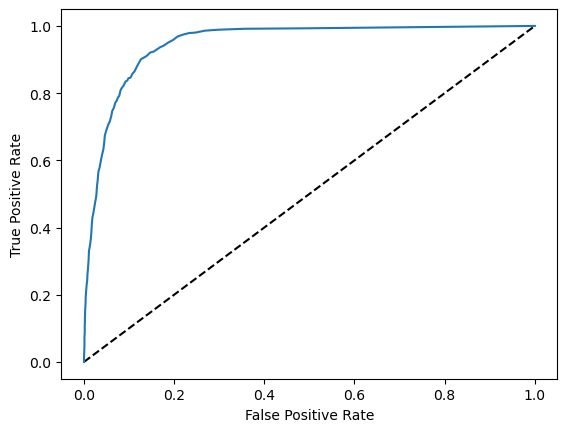

Score: 0.7251823340356334


In [119]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(X_test))
print('Score:',auc_score)

# Confusion matrix for Random Forest classifier:-

In [120]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [122]:
confusion_matrix(y_test,y_pred)

array([[6047,  142],
       [ 376,  331]], dtype=int64)

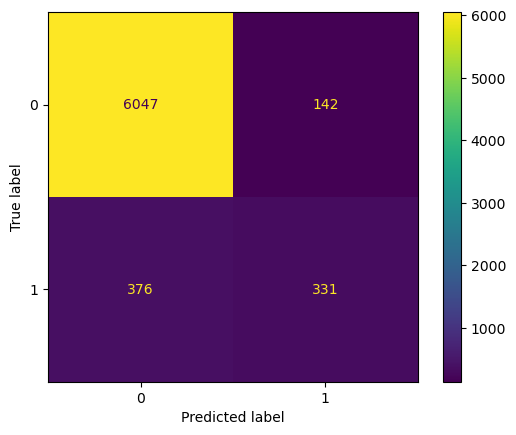

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6189
           1       0.70      0.47      0.56       707

    accuracy                           0.92      6896
   macro avg       0.82      0.72      0.76      6896
weighted avg       0.92      0.92      0.92      6896



In [123]:
predictions=rf.predict(X_test)
cm=confusion_matrix(y_test,predictions,labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

#With the help of above matrix we are able to understand the number of times we got the correct outputs and the number of times our ML model missed to provide the correct prediction.

# Prediction Results:-

In [124]:
results=pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','SVC using Linear','SVC using Poly','SVC using rbf','KNeighbors','Gradient Boosting','GaussianNB','XGB','AdaBoost','ExtraTrees'],
    'Score': [0.9118,0.8963,0.9238,0.9035,0.9115,0.9127,0.9084,0.9203,0.8388,0.9232,0.9161,0.9214]})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
0.9238,Random Forest
0.9232,XGB
0.9214,ExtraTrees
0.9203,Gradient Boosting
0.9161,AdaBoost
0.9127,SVC using rbf
0.9118,Logistic Regression
0.9115,SVC using Poly
0.9084,KNeighbors


# Conclusion:-

The result clearly demonstrate that the RandomForestClassifier algorithm outperforms the other methods,achieving the highest accuracy among all evaluated classifiers.

XGB, Extra Trees and gradient boosting also performed admirably, showing competitive performance with an accuracy close to RandomForestClassifier.

however,Decision Tree and GaussianNB exhibited relatively lower accuracies, indicating that they might not be the best choices for this specific dataset.

# Saving My Best Model:-

In [125]:
#From sklearn.externals import joblib
import joblib

In [126]:
#Save the model as a object file:
joblib.dump(rf,'rffile.obj')

['rffile.obj']

In [129]:
#Load the model from the file:
rf_from_joblib=joblib.load('rffile.obj')

In [130]:
#Use the loaded model to make predictions:
rf_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])